### FIR Low Pass filter using Convolution

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import firwin

In [33]:
def convolve(x, h):
    len_x = len(x)
    len_h = len(h)
    len_y = len_x + len_h - 1
    y = [0] * len_y

    for i in range(len_y):
        for k in range(len_x):
            if(i - k >= 0 and i - k < len_h):
                y[i] += x[k] * h[i - k]

    return y

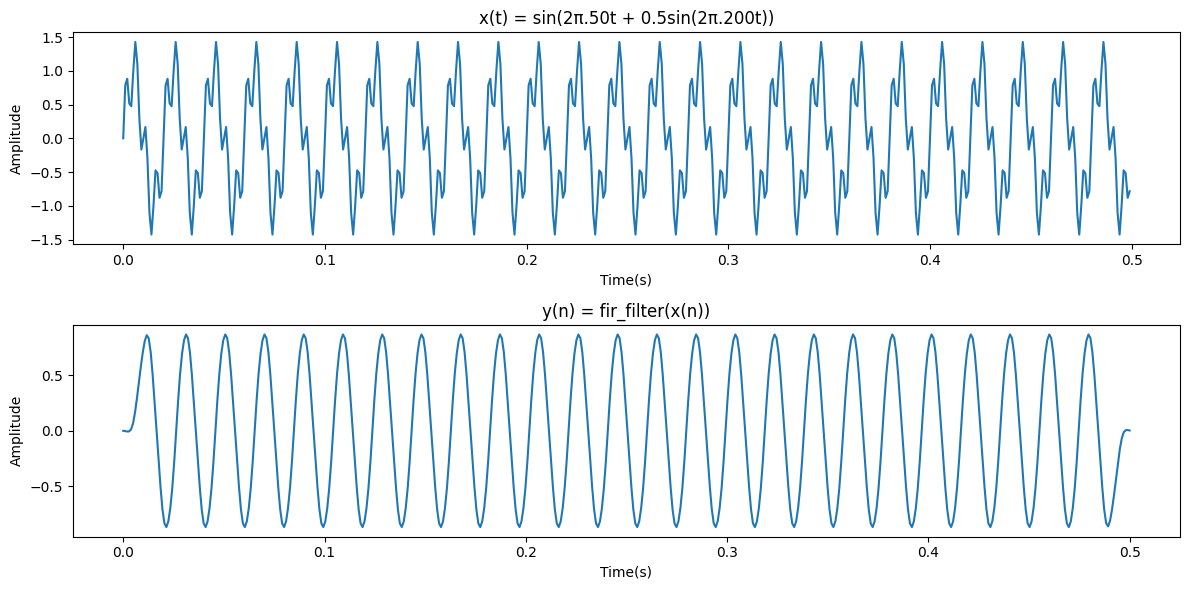

In [34]:
fs = 1000
cutoff_freq = 100

# Number of filter coefficients
num_taps = 15

# list of coefficients
fir_coefficients = firwin(num_taps, cutoff_freq, fs=fs, window="hamming")

t = np.arange(0, 1.0, 1/fs)
x = np.sin(2 * np.pi * 50 * t) + 0.5 * np.sin(2 * np.pi * 200 * t)

t = t[t < 0.5]
x = x[:len(t)]

plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(t, x)
plt.xlabel('Time(s)')
plt.ylabel('Amplitude')
plt.title('x(t) = sin(2π.50t + 0.5sin(2π.200t))')

y = convolve(fir_coefficients, x)
t = np.linspace(0, 0.5, len(y))

plt.subplot(2, 1, 2)
plt.plot(t, y)
plt.xlabel('Time(s)')
plt.ylabel('Amplitude')
plt.title('y(n) = fir_filter(x(n))')

plt.tight_layout()
plt.show()
